# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [30]:
def GUC_Distance (Cluster_Centroids, Data_points, Distance_Type):
## write code here for the Distance function here #
    #Check the distance type
    if(Distance_Type == "Euclidean"):
        #use cdist function and specify the metric type as euclidean
        Cluster_Distance = cdist(Data_points,Cluster_Centroids,metric='euclidean')
    elif(Distance_Type == "Correlation"):
        # Calculate correlation distance
        Cluster_Centroids = np.array(Cluster_Centroids)
        Data_points = np.array(Data_points)
    
        # Calculate the means of each point
        mean1 = np.mean(Cluster_Centroids)
        mean2 = np.mean(Data_points)
    
        # Calculate the Pearson correlation coefficient
        numerator = np.sum((Cluster_Centroids - mean1) * (Data_points - mean2))
        denominator = np.sqrt(np.sum((Cluster_Centroids - mean1) ** 2) * np.sum((Data_points - mean2) ** 2))
    
        # Handle division by zero case
        if denominator == 0:
            return 0
        else:
            Cluster_Distance =  1 - (numerator / denominator)
    return Cluster_Distance

Cluster_Centroids = np.array([[10,23,34],[4,5,6],[1,2,3]])
Data_points = np.array([[1,2,3],[4,5,6],[7,8,9]])
Data_points_mean = np.mean(Data_points, axis = 1)
print(Data_points_mean)
Cluster_Distance = GUC_Distance(Cluster_Centroids , Data_points, "Correlation")
Minimum_index = np.zeros(Data_points.shape[1])
Minimum_index = np.argmin(Cluster_Distance,axis = 1)
print(Cluster_Distance)
print(Minimum_index)
print(len(np.argmin(Cluster_Distance,axis = 1))) 

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [50]:
def GUC_Kmean ( Data_points, Number_of_Clusters, Distance_Type):
   print("K-means started")
   # write code for intial cluster heads here
   #use np.random.choice(number_of_rows in the data,number of random centroids,replacement = false so that the point chosen won't be chosen again)
   centroids = Data_points[np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)]
   #create an array of old centroids that can be used as a stopping condition in the k-means algorithm by comparing the new centroids with the old ones
   #old_centroids = np.zeros((Number_of_Clusters,Data_points.shape[0]))
   old_centroids = np.zeros_like(centroids)
   #create an array storing cluster distances which will be computed from GUC_Distance function
   cluster_distances = np.zeros((Data_points.shape[0],Number_of_Clusters))    
   #create an array storing the minimum distance from the cluster distances array
   Minimum_distances = np.zeros(Data_points.shape[0])
   Minimum_index = np.zeros(Data_points.shape[0])
   #Distortion_array = np.zeros(Number_of_Clusters)
   #Initialize the Distortion list with -1 to enter the K-means loop and use the values in the distortion function to exit the loop
   #Distortion_list = [1] * Number_of_Clusters
   
   # write your your loop
   #while(not(np.array_equal(old_centroids,centroids)) and not()):
   #Stopping condition based on tolerance between old and current centroids
   while (not(np.allclose(old_centroids, centroids, atol=1e-4))):
      if(np.array_equal(old_centroids,centroids)):
         print("The loop is stopped")
         break   
      old_centroids = np.copy(centroids)
      cluster_distances = GUC_Distance(centroids,Data_points,Distance_Type)
      #Minimum_distances = np.min(cluster_distances,axis = 1)
      Minimum_index = np.argmin(cluster_distances,axis = 1) 
      print("Passed")
      
      Distortion_value = 0
      for i in range(Number_of_Clusters):
         #create an array that store the points in each cluster using the minimum distance
         cluster_points = np.zeros(np.shape(Data_points)) 
         cluster_points_index = 0  
         for j in range(len(Minimum_index)):
            #cluster_points[j][Minimum_index[j]] = Data_points[j]
            if(Minimum_index[j] == i):
               cluster_points[cluster_points_index] = Data_points[j] 
               cluster_points_index = cluster_points_index + 1
              
         if(cluster_points_index != 0):
            square_distance = np.sum((cluster_points - centroids[i]) ** 2)
            Distortion_value = Distortion_value + square_distance
            #Distortion_value = Distortion_value + (square_distance / len(cluster_points))
            #mean_square_distance = square_distance/cluster_points_index
            cluster_mean = np.mean(cluster_points,axis = 0)
            centroids[i] = cluster_mean
      
      #Distortion_list.append(Distortion_value)
   
   return [Data_points ,Minimum_index,centroids,Distortion_value] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [27]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [32]:
def display_cluster(X, data_centers=None, data_labels=None, num_clusters=0):
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080']
    no_of_features = X.shape[1]
    plt.rcParams['figure.figsize'] = [10,3]
    #print("Data Labels:", data_labels)
    #print("Data Centers:", data_centers)
    if no_of_features != 2:
        for i in range(no_of_features-1):
            for j in range(i+1, no_of_features):
                fig,ax = plt.subplots()  
                if data_centers is not None and data_labels is not None:  
                    for k in range(num_clusters):
                        ax.scatter(data_centers[:, i][k], data_centers[:, j][k], c=color[k], marker='s', s=20)
                        ax.scatter(X[data_labels == k, i], X[data_labels == k, j], c=color[k], alpha=0.5, s=20)
                        ax.set_xlabel('Feature ' + str(i+1))
                        ax.set_ylabel('Feature ' + str(j+1))
                        
                    ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
                else:
                     ax.scatter(X[:, i], X[:, j], c=color[0], alpha=0.5, s=20)
                     ax.set_xlabel('Feature ' + str(i+1))
                     ax.set_ylabel('Feature ' + str(j+1))
                     ax.set_title('Original Data')
                plt.show();
    
    else:  
        fig, ax = plt.subplots()  
        if data_centers is not None and data_labels is not None:  
            for k in range(num_clusters):
                ax.scatter(data_centers[:, 0][k], data_centers[:, 1][k], c=color[k], marker='s', s=20)
                ax.scatter(X[data_labels == k, 0], X[data_labels == k, 1], c=color[k], alpha=0.5, s=20)
                ax.set_xlabel('Feature 1')
                ax.set_ylabel('Feature 2')

            ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
        else:
            ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=0.5, s=20)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_title('Original Data')

        plt.show();
    

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

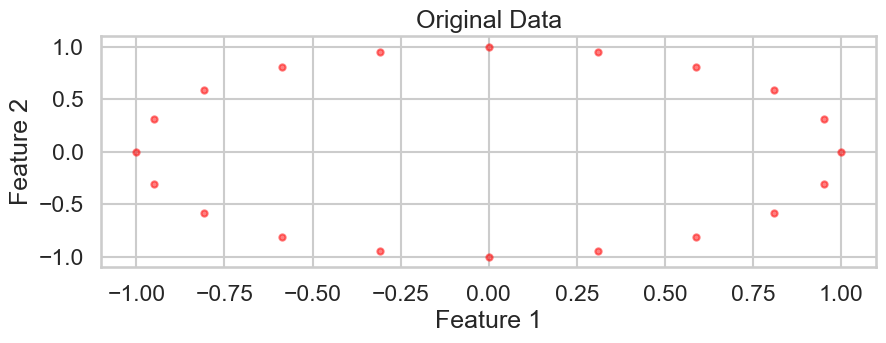

In [33]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X_1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X_1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

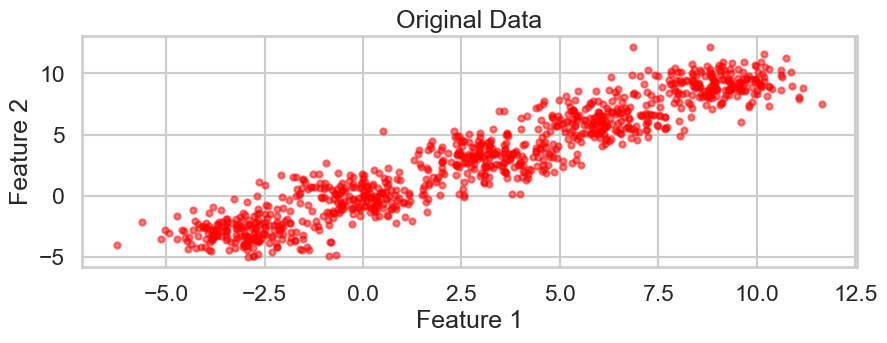

In [40]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X_2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X_2)

#### 2.3. Example 3 : moons Data Gen and display 

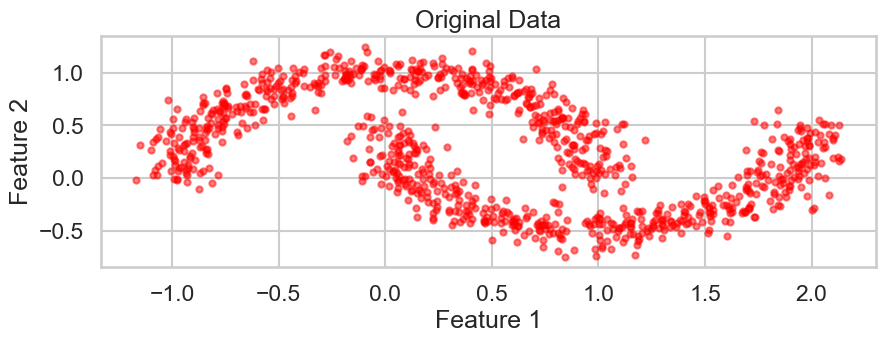

In [41]:
n_samples = 1000
X_3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X_3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

EXAMPLE 1 (EUCLIDEAN)
K-means started
Passed
Passed


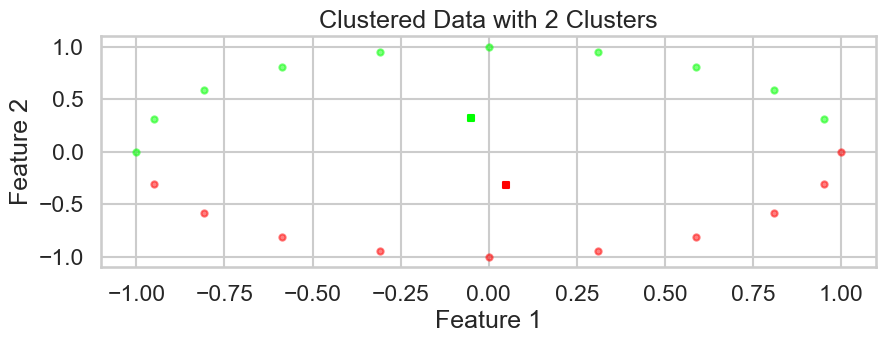

K-means started
Passed
Passed
Passed
Passed


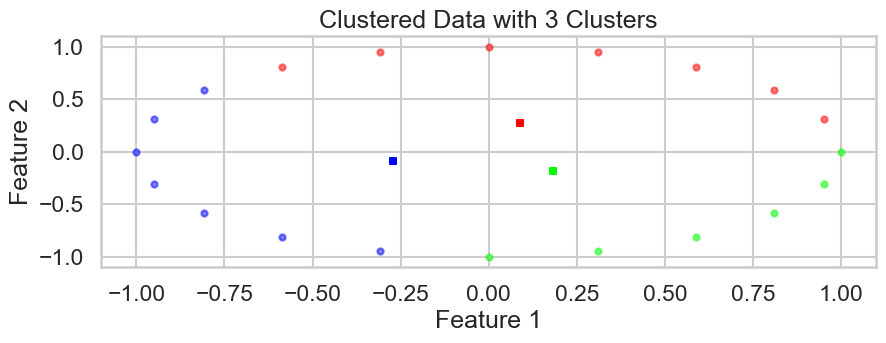

K-means started
Passed
Passed
Passed
Passed


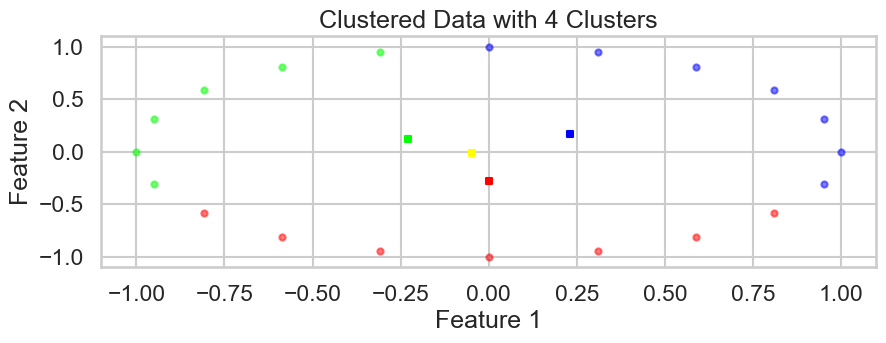

K-means started
Passed
Passed


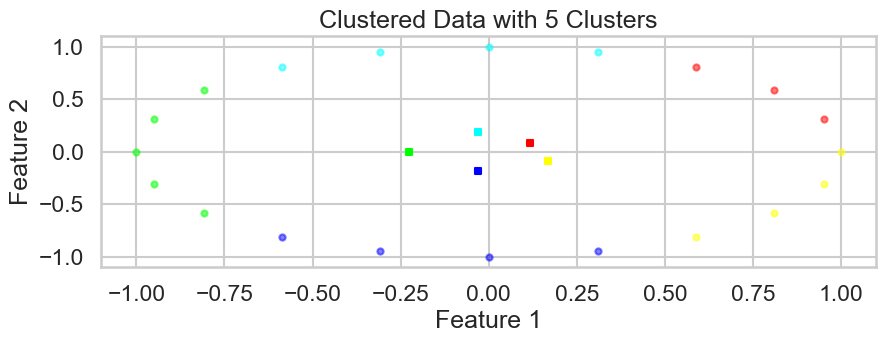

K-means started
Passed
Passed
Passed


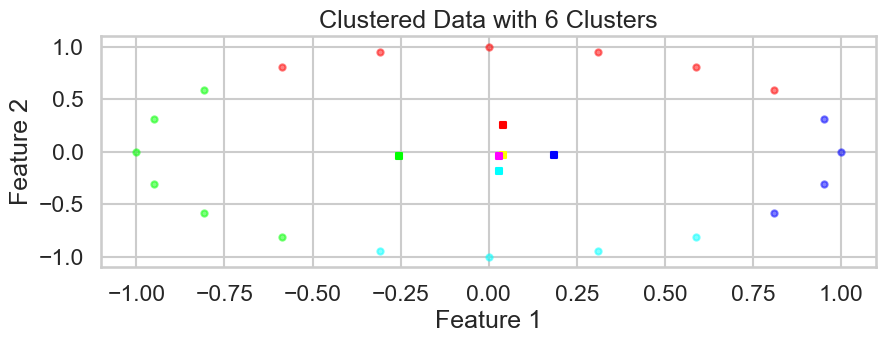

K-means started
Passed
Passed
Passed


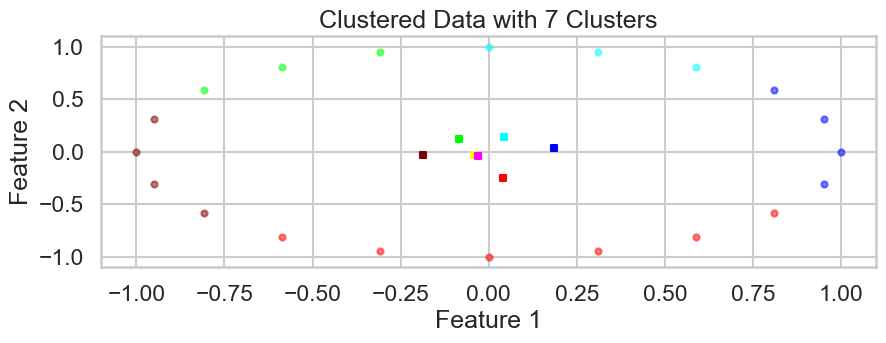

K-means started
Passed
Passed
Passed
Passed
Passed


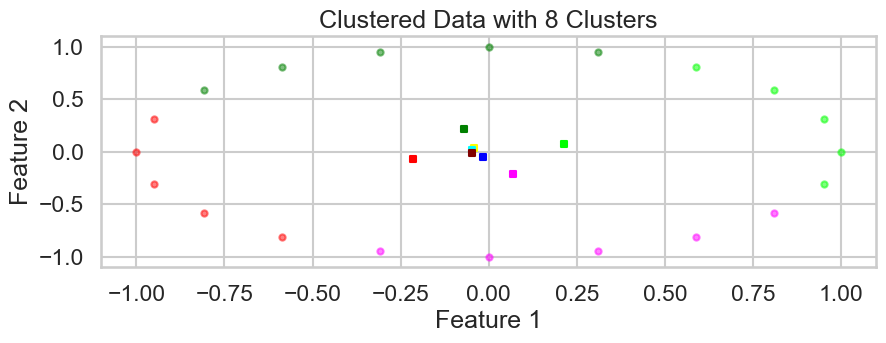

K-means started
Passed
Passed
Passed
Passed


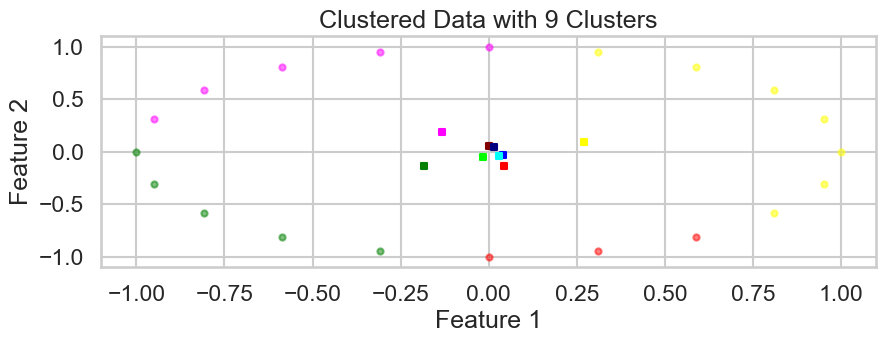

K-means started
Passed
Passed
Passed
Passed
Passed


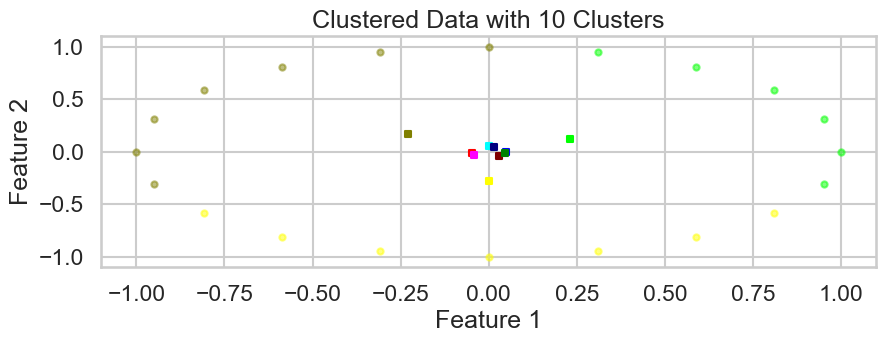

[15.913654181093861, 15.418606156026621, 15.418606156026623, 16.43960390559859, 15.913654181093861, 16.4087022061611, 15.91365418109386, 15.91365418109386, 15.418606156026625]
9
(9,) (9,)


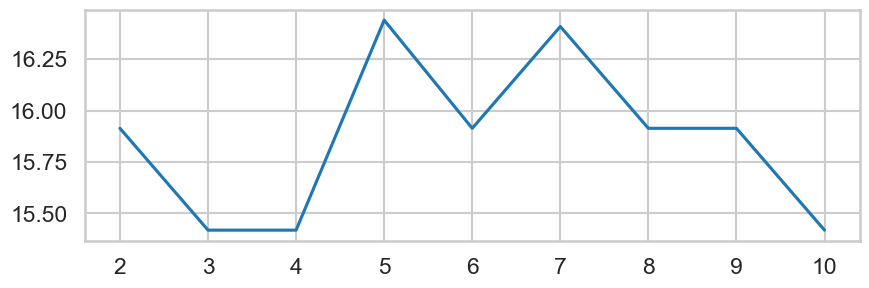

'\nDistortion_list = []\nprint("EXAMPLE 2 (EUCLIDEAN)");\nfor i in range(2,11):\n    example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_2, i,"Euclidean",Distortion_list)\n    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)\n    \n#plt.figure();\n#plt.plot(number_of_clusters);\n#plt.show();\n\nprint("EXAMPLE 3 (EUCLIDEAN)");\nfor i in range(2,11):\n    example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_3, i, "Euclidean",Distortion_list)\n    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)\n'

In [51]:
number_of_clusters = np.arange(2, 11)
Distortion_list = []

print("EXAMPLE 1 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value= GUC_Kmean( X_1, i, "Euclidean")
    Distortion_list.append(Distortion_value)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
plt.figure();
print(Distortion_list)
print(len(Distortion_list))
print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.show();

'''
Distortion_list = []
print("EXAMPLE 2 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_2, i,"Euclidean",Distortion_list)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
    
#plt.figure();
#plt.plot(number_of_clusters);
#plt.show();

print("EXAMPLE 3 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_3, i, "Euclidean",Distortion_list)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
'''    


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Data points:
[[100000002         1         1 ...    150773         1         2]
 [100000003         0         0 ...     89210         0         0]
 [100000004         0         0 ...    171565         1         1]
 ...
 [100001998         0         0 ...     86400         0         0]
 [100001999         1         1 ...     97968         0         0]
 [100002000         0         0 ...     68416         0         0]]
[[100000002         1         1 ...    150773         1         2]
 [100000003         0         0 ...     89210         0         0]
 [100000004         0         0 ...    171565         1         1]
 ...
 [100001998         0         0 ...     86400         0         0]
 [100001999         1         1 ...     97968         0         0]
 [100002000         0         0 ...     68416         0         0]]
CUSTOMER DATA (EUCLIDEAN)
K-means started
Passed
Passed
Passed
The loop is stopped


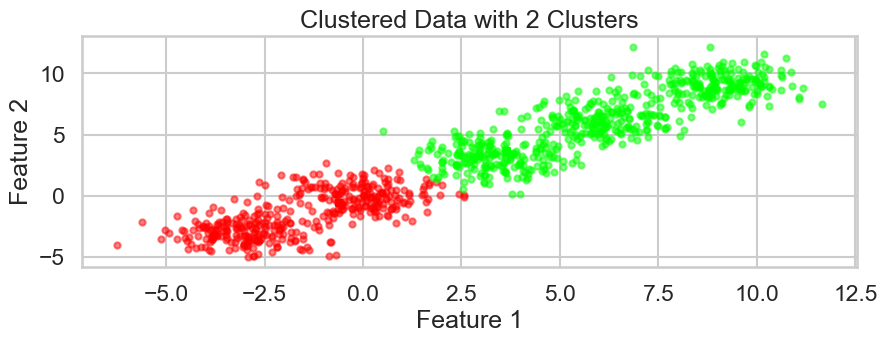

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


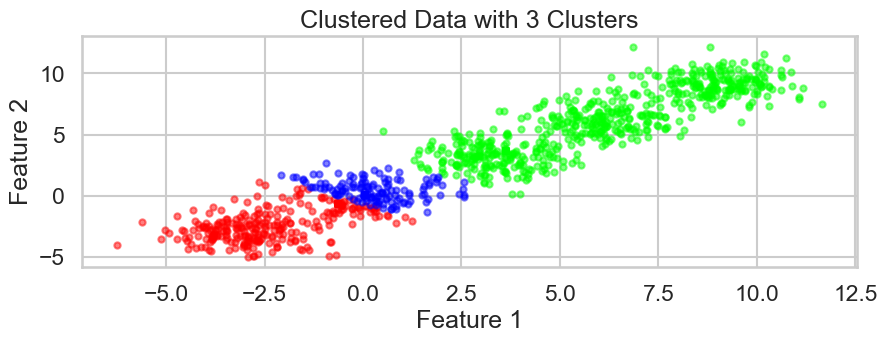

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


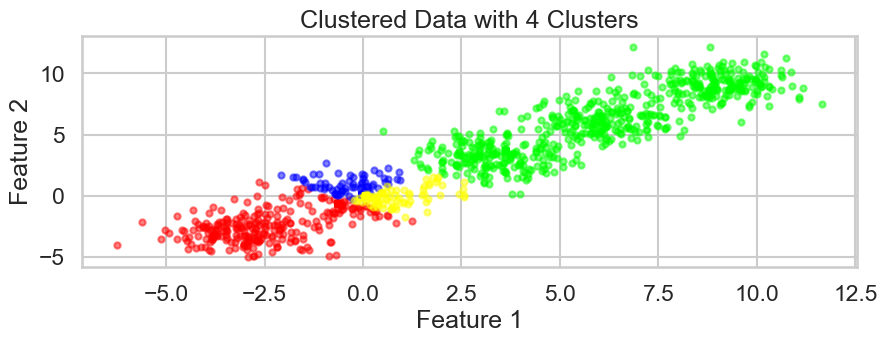

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


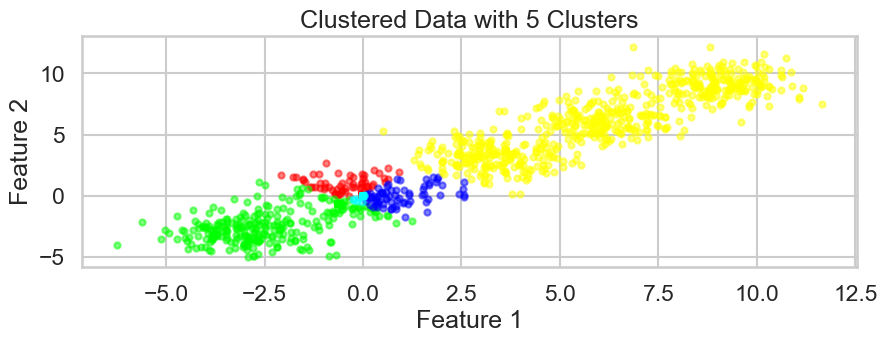

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


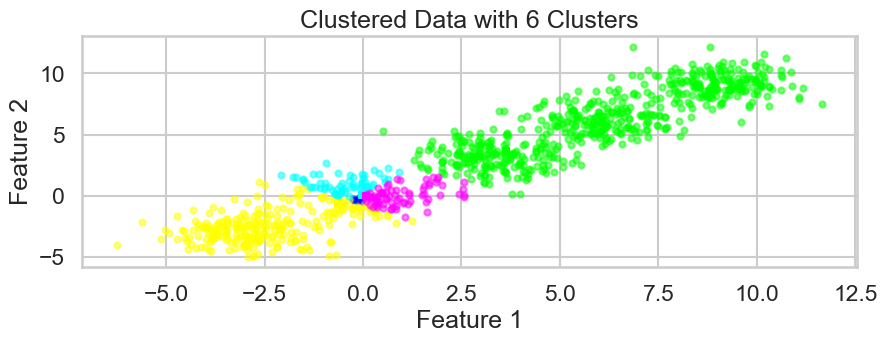

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


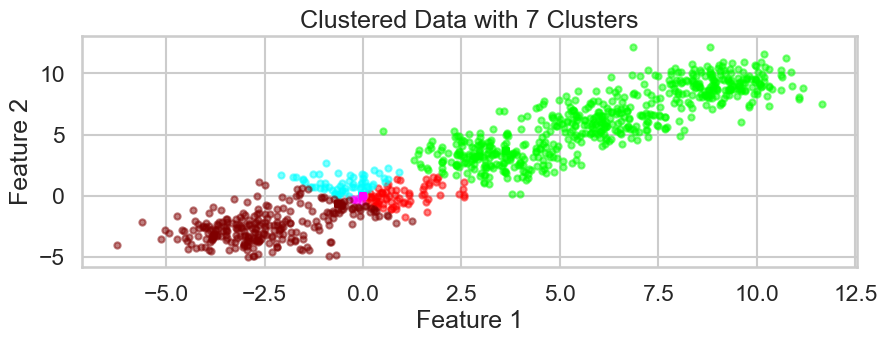

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


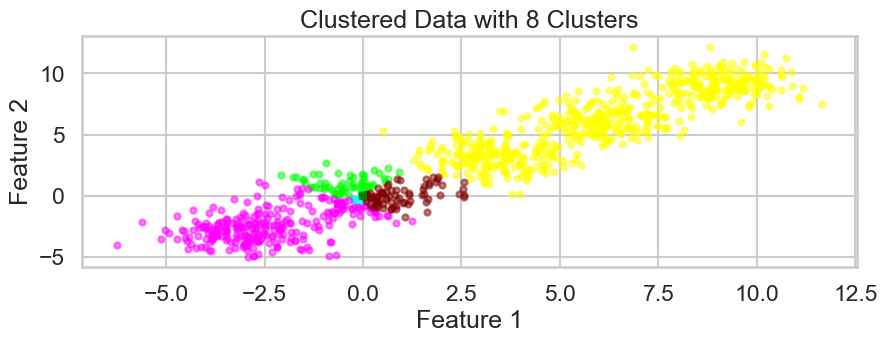

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


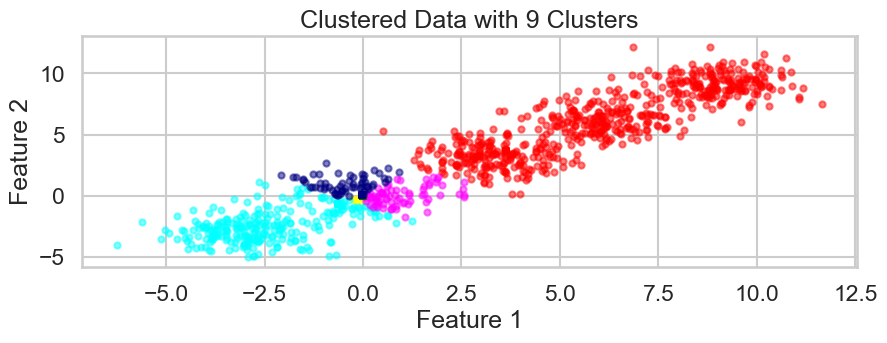

K-means started
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
The loop is stopped


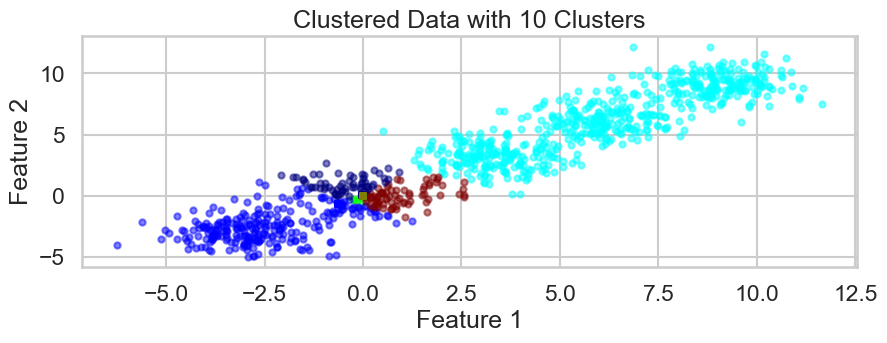

CUSTOMER DATA (CORRELATION)
K-means started


ValueError: operands could not be broadcast together with shapes (1000,2) (2,2) 

In [214]:
#Data_points=np.loadtxt("D:\GUC\Semester 10\Machine Learning\Practice Assignments\Assignment 1/Customer data.csv",delimiter=",",dtype=float);
df = pd.read_csv('D:\GUC\Semester 10\Machine Learning\Practice Assignments\Assignment 1/Customer data.csv')
Data_points = df.values
print("Data points:")
print(Data_points)

print(Data_points)
number_of_clusters = np.arange(2, 11)

print("CUSTOMER DATA (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_2, i,"Euclidean")
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)

'''
print("CUSTOMER DATA (CORRELATION)");
for i in range(2,11):
     example_data,Minimum_index , example_centroids, Distortion_list=GUC_Kmean( X_2, i,"Correlation")
     display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
'''